# Tutorial

In [1]:
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

from atuproot.AtUproot import AtUproot

In [2]:
process = AtUproot("output",
                  quiet = False,
                  parallel_mode = 'multiprocessing',
                  process = 0,
                  max_blocks_per_dataset = -1,
                  max_blocks_per_process = -1,
                  nevents_per_block = 1000000,
                  profile = False,
                  profile_out_path = 'profile.txt')

In [3]:
class TestScribbler(object):
    def __init__(self):
        self.bins = np.linspace(60., 120., 61)

    def begin(self, event):
        self.hist = None
    
    def event(self, event):
        hist, _ = np.histogram(event.M, self.bins)
        if self.hist is None:
            self.hist = hist
        else:
            self.hist += hist
            
    def merge(self, other):
        if self.hist is None:
            self = other
            return
        if other.hist is None:
            return
        
        self.hist += other.hist
        
class TestCollector(object):
    def collect(self, dataset_readers_list):
        reader = dataset_readers_list[0][1][0]
        return (reader.bins, reader.hist)

In [4]:
sequence = [(TestScribbler(), TestCollector())]

In [5]:
Dataset = namedtuple("Dataset", "name tree files")
hzz = Dataset(name = "hzz",
             tree = "events",
             files = ["HZZ.root"])
zuu = Dataset(name = "zuu",
             tree = "events",
             files = ["Zmumu.root"])
datasets = [zuu] #,hzz]

In [6]:
result = process.run(datasets, sequence)


Thu Sep 27 19:20:09 2018
        0 /        1 (  0.00%) zuu 

Thu Sep 27 19:20:09 2018
        1 /        1 (100.00%) zuu 


Thu Sep 27 19:20:09 2018
        1 /        1 (100.00%) zuu 
        1 /        1 (100.00%) collecting results 



In [7]:
bins, hist = result[0][0]

<BarContainer object of 60 artists>

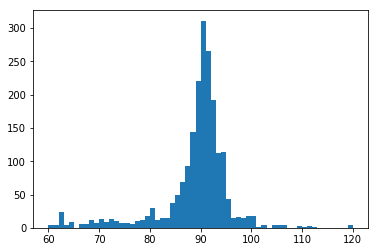

In [8]:
plt.bar(
    (bins[1:]+bins[:-1])/2,
    height = hist,
    width = (bins[1:]-bins[:-1])
)